# Assignment 2

First we use BeautifulSoup to scrape the webpage and save the data in a dataframe

In [211]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# Send a GET request to the webpage
url = "http://mlg.ucd.ie/modules/python/housing/"
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Extract the desired information from the webpage
# For example, let's extract all the table rows and columns
data = []
table = soup.find("table")
rows = table.find_all("tr")
for row in rows:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Create a pandas dataframe from the extracted data
df = pd.DataFrame(data)

# Print the dataframe
print(df)


                 0            1              2     3            4  \
0             None         None           None  None         None   
1     06 Jan, 2020     West End    €732,986.00  2010  1,696 sq ft   
2      06 Jan 2020     West End    €985,889.00  2004  2,355 sq ft   
3        07 Jan 20   Brookville  €1,047,124.00  2013  1,836 sq ft   
4     07 Jan, 2020   Brookville    €516,439.00  2000  1,000 sq ft   
...            ...          ...            ...   ...          ...   
1005   20 Dec 2023   Rivermount    €466,443.00  1936   1,240 sqft   
1006   24 Dec 2023    Clarawood    €662,985.00  1970  1,499 sq ft   
1007   24 Dec 2023    Clarawood    €639,980.00  1969        1,525   
1008   31 Dec 2023  Maple Ridge  €1,131,122.00  2016        1,339   
1009  31 Dec, 2023  Maple Ridge  €1,160,364.00  2018  1,713 sq ft   

                                                      5  
0                                                  None  
1     Type: Detached; Style: 2-Storey; 3 Bedrooms; 2...

The column names were missing so it was added in manually, and then the top 5 rows was printed and we can see missing values in the first row, so we look for missing values in the entire dataset and spot just that one so we drop that row 

In [212]:
# Assuming you have a DataFrame named df
column_names = ['Date', 'Location', 'Price', 'Year', 'Size', 'Description']
df.columns = column_names


In [213]:
df.head()

,Date,Location,Price,Year,Size,Description
0,None,None,None,None,None,None
1,"06 Jan, 2020",West End,"€732,986.00",2010,"1,696 sq ft",Type: Detached; Style: 2-Storey; 3 Bedrooms; 2...
2,06 Jan 2020,West End,"€985,889.00",2004,"2,355 sq ft",Type: Detached; Style: 2-Storey; 4 Bedrooms; 2...
3,07 Jan 20,Brookville,"€1,047,124.00",2013,"1,836 sq ft",Type: Detached; Style: 2-Storey; 3 Bedrooms; 2...
4,"07 Jan, 2020",Brookville,"€516,439.00",2000,"1,000 sq ft",Type: Detached; Style: 1-Storey; 3 Bedrooms; 1...


In [214]:
df.isnull().sum()


Date           1
Location       1
Price          1
Year           1
Size           1
Description    1
dtype: int64

In [215]:
df.dropna(inplace=True)

In [216]:
df.isnull().sum()


Date           0
Location       0
Price          0
Year           0
Size           0
Description    0
dtype: int64

We do some initial exploration of the data using the.info and .describe methods in pandas

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 1 to 1009
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1009 non-null   object
 1   Location     1009 non-null   object
 2   Price        1009 non-null   object
 3   Year         1009 non-null   object
 4   Size         1009 non-null   object
 5   Description  1009 non-null   object
dtypes: object(6)
memory usage: 55.2+ KB


In [218]:
df.describe(include='object')



,Date,Location,Price,Year,Size,Description
count,1009,1009,1009,1009,1009,1009
unique,635,7,1008,117,877,269
top,02 Jun 2023,Clarawood,"€655,566.00",2014,"1,074 sq ft",Type: Detached; Style: 2-Storey; 3 Bedrooms; 2...
freq,9,245,2,54,3,126


We can see that the data types are wrong for all the columns so we fix the date first using the to_datetime method to standardise the date. Then one hot encode the location so that we can train classification models on it.  

In [219]:

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Print the standardized dates
print(df['Date'])


1      2020-01-06
2      2020-01-06
3      2020-01-07
4      2020-01-07
5      2020-01-16
          ...    
1005   2023-12-20
1006   2023-12-24
1007   2023-12-24
1008   2023-12-31
1009   2023-12-31
Name: Date, Length: 1009, dtype: datetime64[ns]


In [220]:
# Assuming your data is stored in a DataFrame called "df"
df_encoded = pd.get_dummies(df, columns=['Location'])



The price, year and size has a bunch of text or symbols in it so we can remove that by using str.replace. \D means all non digits are selected and replaced with empty space. The 3 columns price, size and year are converted into numeric value so that the data type changes.

In [221]:
df_encoded['Price'] = df_encoded['Price'].str.replace(r'\D', '')
df_encoded['Year'] = df_encoded['Year'].str.replace(r'\D', '')
df_encoded['Size'] = df_encoded['Size'].str.replace(r'\D', '')

df_encoded.head()


C:\Users\alin2\AppData\Local\Temp\ipykernel_37416\960008894.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_encoded['Price'] = df_encoded['Price'].str.replace(r'\D', '')
C:\Users\alin2\AppData\Local\Temp\ipykernel_37416\960008894.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_encoded['Year'] = df_encoded['Year'].str.replace(r'\D', '')
C:\Users\alin2\AppData\Local\Temp\ipykernel_37416\960008894.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_encoded['Size'] = df_encoded['Size'].str.replace(r'\D', '')


,Date,Price,Year,Size,Description,Location_Brookville,Location_Clarawood,Location_Maple Ridge,Location_Mile End,Location_Redbridge,Location_Rivermount,Location_West End
1,2020-01-06,73298600,2010,1696,Type: Detached; Style: 2-Storey; 3 Bedrooms; 2...,0,0,0,0,0,0,1
2,2020-01-06,98588900,2004,2355,Type: Detached; Style: 2-Storey; 4 Bedrooms; 2...,0,0,0,0,0,0,1
3,2020-01-07,104712400,2013,1836,Type: Detached; Style: 2-Storey; 3 Bedrooms; 2...,1,0,0,0,0,0,0
4,2020-01-07,51643900,2000,1000,Type: Detached; Style: 1-Storey; 3 Bedrooms; 1...,1,0,0,0,0,0,0
5,2020-01-16,89042300,2011,1536,Type: Detached; Style: 1-Storey; 3 Bedrooms; 2...,1,0,0,0,0,0,0


In [222]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 1 to 1009
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1009 non-null   datetime64[ns]
 1   Price                 1009 non-null   object        
 2   Year                  1009 non-null   object        
 3   Size                  1009 non-null   object        
 4   Description           1009 non-null   object        
 5   Location_Brookville   1009 non-null   uint8         
 6   Location_Clarawood    1009 non-null   uint8         
 7   Location_Maple Ridge  1009 non-null   uint8         
 8   Location_Mile End     1009 non-null   uint8         
 9   Location_Redbridge    1009 non-null   uint8         
 10  Location_Rivermount   1009 non-null   uint8         
 11  Location_West End     1009 non-null   uint8         
dtypes: datetime64[ns](1), object(4), uint8(7)
memory usage: 54.2+ KB


In [223]:
df_encoded['Price'] = pd.to_numeric(df_encoded['Price'])
df_encoded['Year'] = pd.to_numeric(df_encoded['Year'])
df_encoded['Size'] = pd.to_numeric(df_encoded['Size'])

When looking at the data description we see that some null values which were initially represented as ???? in year have now surfaced, we will remove those rows using dropna

In [224]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 1 to 1009
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1009 non-null   datetime64[ns]
 1   Price                 1009 non-null   int64         
 2   Year                  989 non-null    float64       
 3   Size                  1009 non-null   int64         
 4   Description           1009 non-null   object        
 5   Location_Brookville   1009 non-null   uint8         
 6   Location_Clarawood    1009 non-null   uint8         
 7   Location_Maple Ridge  1009 non-null   uint8         
 8   Location_Mile End     1009 non-null   uint8         
 9   Location_Redbridge    1009 non-null   uint8         
 10  Location_Rivermount   1009 non-null   uint8         
 11  Location_West End     1009 non-null   uint8         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), uint8(7)
memory usage

In [225]:
df_encoded.dropna(inplace=True)

In [226]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 1 to 1009
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  989 non-null    datetime64[ns]
 1   Price                 989 non-null    int64         
 2   Year                  989 non-null    float64       
 3   Size                  989 non-null    int64         
 4   Description           989 non-null    object        
 5   Location_Brookville   989 non-null    uint8         
 6   Location_Clarawood    989 non-null    uint8         
 7   Location_Maple Ridge  989 non-null    uint8         
 8   Location_Mile End     989 non-null    uint8         
 9   Location_Redbridge    989 non-null    uint8         
 10  Location_Rivermount   989 non-null    uint8         
 11  Location_West End     989 non-null    uint8         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), uint8(7)
memory usage:

The description column had a lot of information but was in an unusable form so we split the data into 4 based on the presence of ";". Once this is done the type and style section has the value stored after the : so we split using that and take the 2nd value.

For the bedroom and bathroom , we split using the "<space> " and select the numerical value among the split generated using the extract_number function defined 

In [227]:
# Splitting the 'Description' column based on ';'
df_encoded['Description_split'] = df_encoded['Description'].str.split(';')

# Extracting values for 'type', 'style', 'bedroom', and 'bathroom'
df_encoded['Type'] = df_encoded['Description_split'].apply(lambda x: [i.split(':')[1].strip() for i in x if 'Type' in i][0] if any('Type' in i for i in x) else None)
df_encoded['Style'] = df_encoded['Description_split'].apply(lambda x: [i.split(':')[1].strip() for i in x if 'Style' in i][0] if any('Style' in i for i in x) else None)



In [228]:
import re

def extract_number(text):
    parts = text.split(' ')
    return parts[0].strip() if re.match(r'^\d+$', parts[0].strip()) else parts[1].strip()

df_encoded['Bathroom'] = df_encoded['Description_split'].apply(lambda x: [extract_number(i) for i in x if 'Bathroom' in i][0] if any('Bathroom' in i for i in x) else None)
df_encoded['Bedroom'] = df_encoded['Description_split'].apply(lambda x: [extract_number(i) for i in x if 'Bedroom' in i][0] if any('Bedroom' in i for i in x) else None)

In [229]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 1 to 1009
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  989 non-null    datetime64[ns]
 1   Price                 989 non-null    int64         
 2   Year                  989 non-null    float64       
 3   Size                  989 non-null    int64         
 4   Description           989 non-null    object        
 5   Location_Brookville   989 non-null    uint8         
 6   Location_Clarawood    989 non-null    uint8         
 7   Location_Maple Ridge  989 non-null    uint8         
 8   Location_Mile End     989 non-null    uint8         
 9   Location_Redbridge    989 non-null    uint8         
 10  Location_Rivermount   989 non-null    uint8         
 11  Location_West End     989 non-null    uint8         
 12  Description_split     989 non-null    object        
 13  Type               

In [230]:
df_encoded.dropna(inplace=True)

In [231]:
df_encoded.head(5)

,Date,Price,Year,Size,Description,Location_Brookville,Location_Clarawood,Location_Maple Ridge,Location_Mile End,Location_Redbridge,Location_Rivermount,Location_West End,Description_split,Type,Style,Bathroom,Bedroom
1,2020-01-06,73298600,2010.0,1696,Type: Detached; Style: 2-Storey; 3 Bedrooms; 2...,0,0,0,0,0,0,1,"[Type: Detached, Style: 2-Storey, 3 Bedrooms...",Detached,2-Storey,2,3
2,2020-01-06,98588900,2004.0,2355,Type: Detached; Style: 2-Storey; 4 Bedrooms; 2...,0,0,0,0,0,0,1,"[Type: Detached, Style: 2-Storey, 4 Bedrooms...",Detached,2-Storey,2,4
3,2020-01-07,104712400,2013.0,1836,Type: Detached; Style: 2-Storey; 3 Bedrooms; 2...,1,0,0,0,0,0,0,"[Type: Detached, Style: 2-Storey, 3 Bedrooms...",Detached,2-Storey,2,3
4,2020-01-07,51643900,2000.0,1000,Type: Detached; Style: 1-Storey; 3 Bedrooms; 1...,1,0,0,0,0,0,0,"[Type: Detached, Style: 1-Storey, 3 Bedrooms...",Detached,1-Storey,1,3
5,2020-01-16,89042300,2011.0,1536,Type: Detached; Style: 1-Storey; 3 Bedrooms; 2...,1,0,0,0,0,0,0,"[Type: Detached, Style: 1-Storey, 3 Bedrooms...",Detached,1-Storey,2,3


The original description column and the column containing split data was then dropped. We then look at the individual unique values in each new column created and notice multiple lables for the same value. We fix this using th .replace or using a custom function.apply or index the df in positions where a condition is satisfied and then replace the other rows accordingly. This is done for both the type and style columns.

In [232]:
df_encoded.drop(columns=['Description', 'Description_split'], inplace=True)

In [233]:
df_encoded['Type'].value_counts()

Detached          811
Semi-Detached      53
End-of-Terrace     30
Terraced           27
Duplex             27
Semi-D              5
Bunaglow            4
EndOfTerrace        4
Name: Type, dtype: int64

In [234]:
df_encoded['Type'] = df_encoded['Type'].replace('EndOfTerrace', 'End-of-Terrace')
df_encoded['Type'] = df_encoded['Type'].apply(lambda x: 'Semi-Detached' if x == 'Semi-D' else x)



In [235]:
df_encoded['Type'].value_counts()

Detached          811
Semi-Detached      58
End-of-Terrace     34
Terraced           27
Duplex             27
Bunaglow            4
Name: Type, dtype: int64

In [236]:
df_encoded['Style'].value_counts()

1-Storey      503
2-Storey      330
Dormer         63
One-Storey     48
Two-Storey     17
Name: Style, dtype: int64

In [237]:
df_encoded.loc[df_encoded['Style'] == 'One-Storey', 'Style'] = '1-Storey'
df_encoded.loc[df_encoded['Style'] == 'Two-Storey', 'Style'] = '2-Storey'

In [238]:
df_encoded['Style'].value_counts()

1-Storey    551
2-Storey    347
Dormer       63
Name: Style, dtype: int64

In [239]:
df_encoded['Bathroom'].value_counts()


2    522
1    404
3     35
Name: Bathroom, dtype: int64

In [240]:
df_encoded['Bedroom'].value_counts()

3    567
2    217
4    140
1     25
5     12
Name: Bedroom, dtype: int64

In [241]:
df_encoded['Bedroom'] = pd.to_numeric(df_encoded['Bedroom'])
df_encoded['Bathroom'] = pd.to_numeric(df_encoded['Bathroom'])

In [242]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 1 to 1009
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  961 non-null    datetime64[ns]
 1   Price                 961 non-null    int64         
 2   Year                  961 non-null    float64       
 3   Size                  961 non-null    int64         
 4   Location_Brookville   961 non-null    uint8         
 5   Location_Clarawood    961 non-null    uint8         
 6   Location_Maple Ridge  961 non-null    uint8         
 7   Location_Mile End     961 non-null    uint8         
 8   Location_Redbridge    961 non-null    uint8         
 9   Location_Rivermount   961 non-null    uint8         
 10  Location_West End     961 non-null    uint8         
 11  Type                  961 non-null    object        
 12  Style                 961 non-null    object        
 13  Bathroom           

Since type and style are categorical variables they are one hot encoded.

In [243]:
df_encoded = pd.get_dummies(df_encoded, columns=['Style', 'Type'])


In [244]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 1 to 1009
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  961 non-null    datetime64[ns]
 1   Price                 961 non-null    int64         
 2   Year                  961 non-null    float64       
 3   Size                  961 non-null    int64         
 4   Location_Brookville   961 non-null    uint8         
 5   Location_Clarawood    961 non-null    uint8         
 6   Location_Maple Ridge  961 non-null    uint8         
 7   Location_Mile End     961 non-null    uint8         
 8   Location_Redbridge    961 non-null    uint8         
 9   Location_Rivermount   961 non-null    uint8         
 10  Location_West End     961 non-null    uint8         
 11  Bathroom              961 non-null    int64         
 12  Bedroom               961 non-null    int64         
 13  Style_1-Storey     

Before using ML, the continuous variables are standardized using min_max as this is more readable than using standard normal

In [245]:
from sklearn.preprocessing import MinMaxScaler

# Select the continuous variables to be standardized
continuous_vars = ['Bedroom','Bathroom', 'Year', 'Size']

# Create a StandardScaler object
scaler = MinMaxScaler()

# Standardize the selected variables
df_encoded[continuous_vars] = scaler.fit_transform(df_encoded[continuous_vars])


In [246]:
df_encoded.head(5)

,Date,Price,Year,Size,Location_Brookville,Location_Clarawood,Location_Maple Ridge,Location_Mile End,Location_Redbridge,Location_Rivermount,...,Bedroom,Style_1-Storey,Style_2-Storey,Style_Dormer,Type_Bunaglow,Type_Detached,Type_Duplex,Type_End-of-Terrace,Type_Semi-Detached,Type_Terraced
1,2020-01-06,73298600,0.934307,0.360721,0,0,0,0,0,0,...,0.50,0,1,0,0,1,0,0,0,0
2,2020-01-06,98588900,0.890511,0.580828,0,0,0,0,0,0,...,0.75,0,1,0,0,1,0,0,0,0
3,2020-01-07,104712400,0.956204,0.407482,1,0,0,0,0,0,...,0.50,0,1,0,0,1,0,0,0,0
4,2020-01-07,51643900,0.861314,0.128257,1,0,0,0,0,0,...,0.50,1,0,0,0,1,0,0,0,0
5,2020-01-16,89042300,0.941606,0.307281,1,0,0,0,0,0,...,0.50,1,0,0,0,1,0,0,0,0


We now look at the correlation between the variables in the dataset in heatmap. The we look at the correlation of price with the continuous and categorical features independently.

C:\Users\alin2\AppData\Local\Temp\ipykernel_37416\3250296443.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_encoded.corr(), annot=True)


<Axes: >

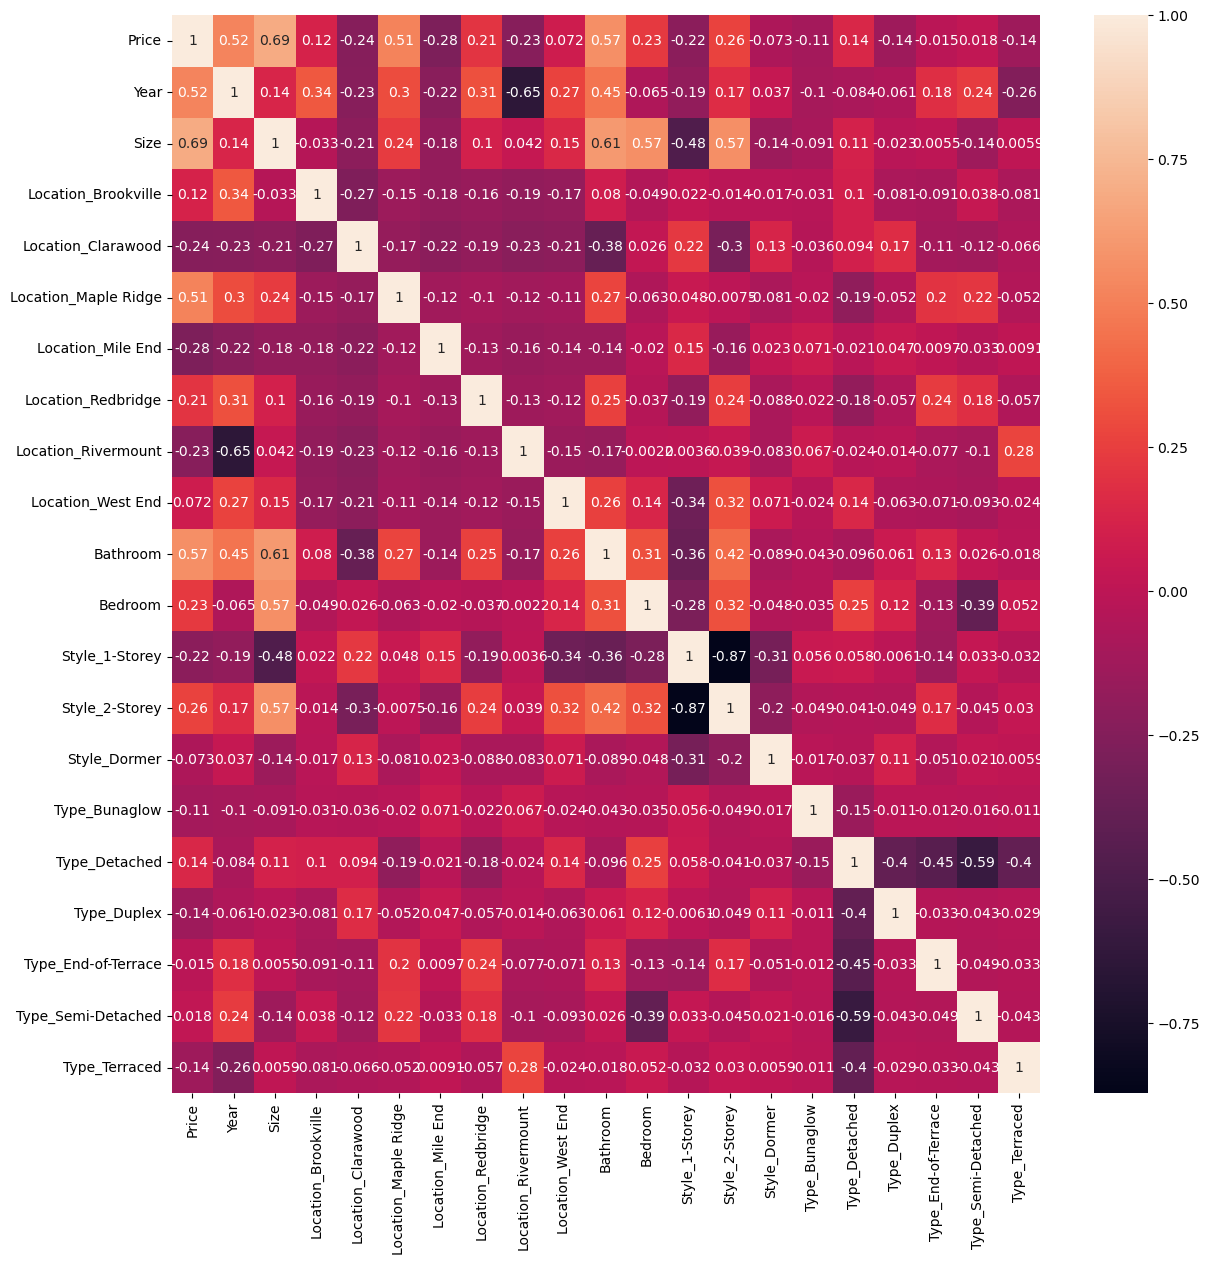

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

plt = plt.subplots(figsize=(14, 14))    
sns.heatmap(df_encoded.corr(), annot=True)




In [248]:
df_continuous = df_encoded[['Price', 'Year', 'Size', 'Bedroom', 'Bathroom']]
df_categorical = df_encoded.drop(columns=[ 'Year', 'Size', 'Bedroom', 'Bathroom'])

In [249]:
df_continuous.corrwith(df_continuous['Price']).sort_values(ascending=False)

Price       1.000000
Size        0.689955
Bathroom    0.567771
Year        0.520966
Bedroom     0.226343
dtype: float64

The most important features seem to be size and number of bathrooms followed by year of construction and number of bedrooms 

In [250]:
df_continuous.head(5)

,Price,Year,Size,Bedroom,Bathroom
1,73298600,0.934307,0.360721,0.50,0.5
2,98588900,0.890511,0.580828,0.75,0.5
3,104712400,0.956204,0.407482,0.50,0.5
4,51643900,0.861314,0.128257,0.50,0.0
5,89042300,0.941606,0.307281,0.50,0.5


In [251]:
df_categorical.corrwith(df_categorical['Price']).sort_values(ascending=False)

C:\Users\alin2\AppData\Local\Temp\ipykernel_37416\775740041.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_categorical.corrwith(df_categorical['Price']).sort_values(ascending=False)


Price                   1.000000
Location_Maple Ridge    0.514095
Style_2-Storey          0.263204
Location_Redbridge      0.205619
Type_Detached           0.138969
Location_Brookville     0.120827
Location_West End       0.071717
Type_Semi-Detached      0.017770
Type_End-of-Terrace    -0.015239
Style_Dormer           -0.073474
Type_Bunaglow          -0.105926
Type_Duplex            -0.135177
Type_Terraced          -0.137350
Style_1-Storey         -0.218839
Location_Rivermount    -0.234648
Location_Clarawood     -0.238648
Location_Mile End      -0.275187
dtype: float64

For categorical variables certain locations like Maple ridge and redbridge seem to be important along with presence of extra floors

Next we use linear regression to predict the price of the houses based on the other numerical features and look at the coeffcient of each feature as a proxy for feature importance.

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Define the predictor variable (X) and the target variable (y)
X = df_continuous.drop(columns=['Price'])
y = df_continuous['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X_train, y_train)

# Predict the housing prices for new data points
y_pred = model.predict(X_test)


# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)



Mean Squared Error (MSE): 339821011048006.44
Root Mean Squared Error (RMSE): 18434234.75623565
Mean Absolute Error (MAE): 13374713.881082362
R-squared (R2) Score: 0.6502659684294934


In [253]:
# Get the coefficients
coefficients = model.coef_

# Print the feature importance
for feature, coefficient in zip(X.columns, coefficients):
    print(f"{feature}: {coefficient}")


Year: 59184767.0991756
Size: 164471850.39149073
Bedroom: -32205174.225184627
Bathroom: -2673863.0954543506


In [254]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 1 to 1009
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  961 non-null    datetime64[ns]
 1   Price                 961 non-null    int64         
 2   Year                  961 non-null    float64       
 3   Size                  961 non-null    float64       
 4   Location_Brookville   961 non-null    uint8         
 5   Location_Clarawood    961 non-null    uint8         
 6   Location_Maple Ridge  961 non-null    uint8         
 7   Location_Mile End     961 non-null    uint8         
 8   Location_Redbridge    961 non-null    uint8         
 9   Location_Rivermount   961 non-null    uint8         
 10  Location_West End     961 non-null    uint8         
 11  Bathroom              961 non-null    float64       
 12  Bedroom               961 non-null    float64       
 13  Style_1-Storey     

For the next part of the assignment, we convert the one hot encoded locations back into 1 column as they are the target variables for the next classification task.
We then use label_encoder to convert the categorical variables into numerical values.

In [255]:
# Assuming you have a DataFrame with one-hot encoded columns
df = df_encoded[['Location_Brookville',        
                 'Location_Clarawood',          
                 'Location_Maple Ridge',      
                 'Location_Mile End',           
                 'Location_Redbridge',      
                 'Location_Rivermount','Location_West End']]

# Reverse one-hot encoding into a single column
df_encoded['Location'] = df.idxmax(axis=1)

# Drop the one-hot encoded columns
df_encoded = df_encoded.drop(['Location_Brookville',        
                 'Location_Clarawood',          
                 'Location_Maple Ridge',      
                 'Location_Mile End',           
                 'Location_Redbridge',      
                 'Location_Rivermount','Location_West End'], axis=1)

print(df_encoded.head(5))


        Date      Price      Year      Size  Bathroom  Bedroom  \
1 2020-01-06   73298600  0.934307  0.360721       0.5     0.50   
2 2020-01-06   98588900  0.890511  0.580828       0.5     0.75   
3 2020-01-07  104712400  0.956204  0.407482       0.5     0.50   
4 2020-01-07   51643900  0.861314  0.128257       0.0     0.50   
5 2020-01-16   89042300  0.941606  0.307281       0.5     0.50   

   Style_1-Storey  Style_2-Storey  Style_Dormer  Type_Bunaglow  Type_Detached  \
1               0               1             0              0              1   
2               0               1             0              0              1   
3               0               1             0              0              1   
4               1               0             0              0              1   
5               1               0             0              0              1   

   Type_Duplex  Type_End-of-Terrace  Type_Semi-Detached  Type_Terraced  \
1            0                    0       

In [256]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical variable
df_encoded['Location'] = label_encoder.fit_transform(df_encoded['Location'])


We the create a random forest model to predict the location of the house based on the other features. initially we use all the features to predict the location of the house and look at the feature_importances. Then we use the feature importance to select the most important features to predict the location of the house. 

In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


X = df_encoded.drop(columns=['Location','Date'])
y = df_encoded['Location']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')

print(f"F1 Score: {f1}")


F1 Score: 0.707381943972542


In [258]:

feature_importances = rf_model.feature_importances_

# Print the feature importances

for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")   

Price: 0.2660768857060995
Year: 0.3166181291085671
Size: 0.1968429783018411
Bathroom: 0.0417742682679564
Bedroom: 0.05455827329740668
Style_1-Storey: 0.02165890642948627
Style_2-Storey: 0.023272038105870693
Style_Dormer: 0.008576263232661871
Type_Bunaglow: 0.0012913695959708357
Type_Detached: 0.029213776087374427
Type_Duplex: 0.007385100913322086
Type_End-of-Terrace: 0.010377599418224522
Type_Semi-Detached: 0.011990953713910459
Type_Terraced: 0.010363457821308038


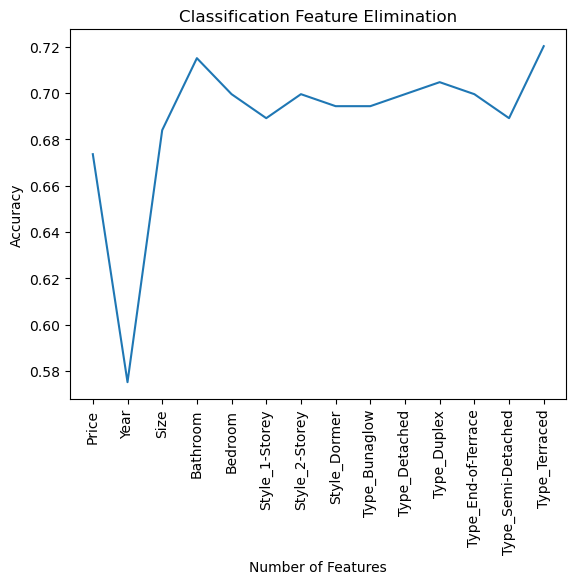

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = df_encoded.drop(columns=['Location','Date'])
y = df_encoded['Location']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = RandomForestClassifier( n_estimators=1000, random_state=42)

# Define the list of all features
all_features = X.columns.tolist()

# Initialize an empty list to store performance scores
performance_scores = []

# Iterate over the features
for feature in all_features:
    # Remove the current feature from the list
    selected_features = [f for f in all_features if f != feature]
    
    # Train the classifier using the remaining features
    clf.fit(X_train[selected_features], y_train)
    
    # Evaluate the performance on the testing set
    score = clf.score(X_test[selected_features], y_test)
    
    # Store the performance score
    performance_scores.append(score)

# Plot the performance scores
plt.plot(range(len(all_features)), performance_scores)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Classification Feature Elimination')
plt.xticks(range(len(all_features)), all_features, rotation=90)
plt.show()


In [260]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

selected_features_all = []

for i in range(3, 15):

    # Define your X and y variables
    X = df_encoded.drop(['Location','Date'], axis=1)
    y = df_encoded['Location']

    # Create a  regression model
    #model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model = RandomForestClassifier(n_estimators=1000, random_state=42)

    # Create the RFE object and specify the number of features to select
    rfe = RFE(estimator=model, n_features_to_select=i)

    # Fit the RFE object to the data
    rfe.fit(X, y)

    # Get the selected features
    selected_features = X.columns[rfe.support_]

    # Print the selected features
    print(selected_features)
    selected_features_all.append(selected_features)

Index(['Price', 'Style_1-Storey', 'Type_Detached'], dtype='object')
Index(['Price', 'Style_1-Storey', 'Style_2-Storey', 'Type_Detached'], dtype='object')
Index(['Price', 'Year', 'Style_1-Storey', 'Style_2-Storey', 'Type_Detached'], dtype='object')
Index(['Price', 'Year', 'Bedroom', 'Style_1-Storey', 'Style_2-Storey',
       'Type_Detached'],
      dtype='object')
Index(['Price', 'Year', 'Bathroom', 'Bedroom', 'Style_1-Storey',
       'Style_2-Storey', 'Type_Detached'],
      dtype='object')
Index(['Price', 'Year', 'Bathroom', 'Bedroom', 'Style_1-Storey',
       'Style_2-Storey', 'Style_Dormer', 'Type_Detached'],
      dtype='object')
Index(['Price', 'Year', 'Bathroom', 'Bedroom', 'Style_1-Storey',
       'Style_2-Storey', 'Style_Dormer', 'Type_Detached',
       'Type_Semi-Detached'],
      dtype='object')
Index(['Price', 'Year', 'Bathroom', 'Bedroom', 'Style_1-Storey',
       'Style_2-Storey', 'Style_Dormer', 'Type_Detached',
       'Type_End-of-Terrace', 'Type_Semi-Detached'],
      d

In [261]:

for i in range(len(selected_features_all)):
    print(f"Number of Features: {len(selected_features_all[i])}")
    # Assuming you have your features (X) and target variable (y) ready
    X = df_encoded[selected_features_all[i]]
    y = df_encoded['Location']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

    # Fit the model to the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = rf_model.predict(X_test)

    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"F1 Score: {f1}")



Number of Features: 3
F1 Score: 0.4276868099364019
Number of Features: 4
F1 Score: 0.4484082633094231
Number of Features: 5
F1 Score: 0.6480976889153347
Number of Features: 6
F1 Score: 0.6905372784609972
Number of Features: 7
F1 Score: 0.6799560093730843
Number of Features: 8
F1 Score: 0.6814282298724866
Number of Features: 9
F1 Score: 0.665183560532686
Number of Features: 10
F1 Score: 0.6791329858631623
Number of Features: 11
F1 Score: 0.680571928802836
Number of Features: 12
F1 Score: 0.6805403380490656
Number of Features: 13
F1 Score: 0.6908535707143615
Number of Features: 14
F1 Score: 0.6869420558258524
